In [ ]:
### Define Model Setup Steps

In [1]:
modelPath = 'Models/Davison2003/bulbNet'
modelName = 'Davison2003'

def getSomaScript(h):
    
    h.load_file('mosinit.hoc')
    h.run_experiment('odour_baseline')
    soma = h.Mit[0].soma
    
    return soma

### Create Model 

In [2]:
%matplotlib inline
import helpers

mod1 = helpers.createModel(name = modelName, \
                           path = modelPath, \
               getSectionScript = getSomaScript)

In [3]:
# Interactively find stimulation currents
helpers.IClampWidget(mod1)

Widget Javascript not detected.  It may not be installed properly.


In [4]:
from quantities import nA, s, ms

##### Set currents
i_rest =    {'amplitude':     0*nA, 'delay': 0.5*s, 'duration': 1*s}
i_passive = {'amplitude': -0.07*nA, 'delay': 0.5*s, 'duration': 1*s}
i_ap  =     {'amplitude':     7*nA, 'delay': 0.5*s, 'duration': 1*ms}
i_thresh =  {'amplitude':  0.135*nA, 'delay': 0.5*s, 'duration': 1000*ms}

### Setup Tests

----------
Running Test: Resting potential test
Expected: -57.4345864662 mV +/- 24.630188347 mV SD
Actual: -65.6658765828 mV, Z: -0.334195175477 SDs


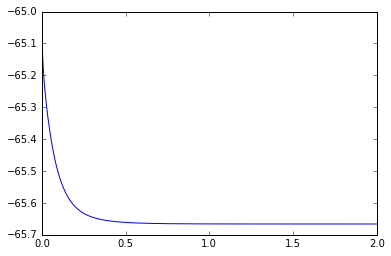

array(-65.66587658283359) * mV

In [5]:
# Initialize the tests and get their expected values
tests = helpers.setupTests(i_rest, i_passive, i_ap, i_thresh, expectedSource = "Pooled")

helpers.runOneTest(tests[0], mod1)

----------
Running Test: Resting potential test
Expected: -57.4345864662 mV +/- 24.630188347 mV SD
Actual: -65.6658765828 mV, Z: -0.334195175477 SDs


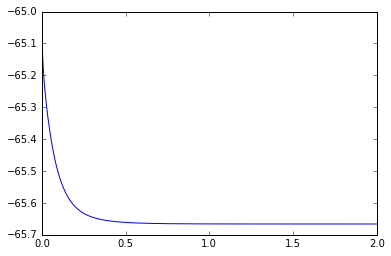

----------
Running Test: Input resistance test
Expected: 145113133.641 ohm +/- 189410293.868 ohm SD
Actual: 78470665.1237 kg*m**2/(s**3*A**2), Z: -0.351841851655 SDs


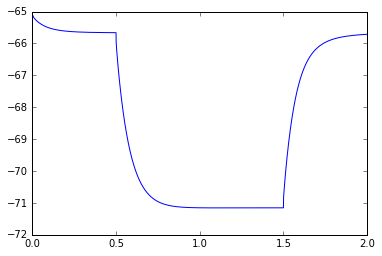

----------
Running Test: Time constant test
Expected: 27.9651006711 ms +/- 66.3591805191 ms SD
Actual: 78.7822331466 ms, Z: 0.765789029913 SDs


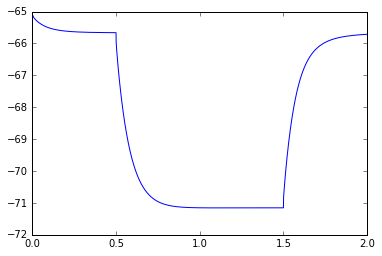

----------
Running Test: Injected current AP width test
Expected: 1.513125 ms +/- 0.961592715477 ms SD
Actual: 0.425 ms, Z: -1.13158615127 SDs


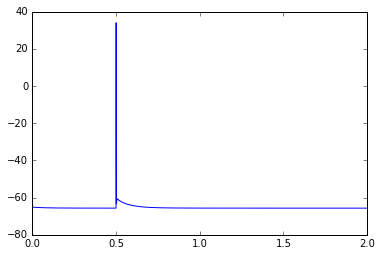

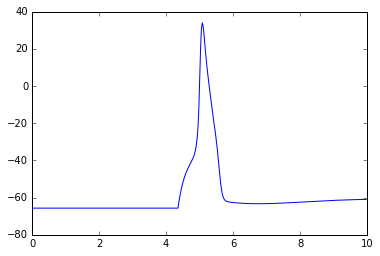

----------
Running Test: Injected current AP threshold test
Expected: -34.6053571429 mV +/- 56.7790487536 mV SD
Actual: -35.1232385971 mV, Z: -0.00912099560613 SDs


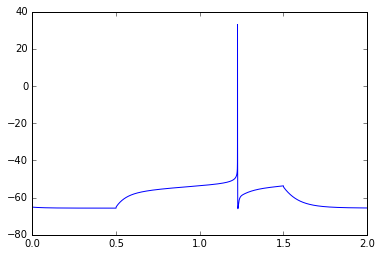

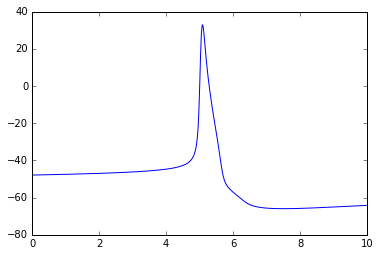

----------
Running Test: Injected current AP amplitude test
Expected: 68.776 mV +/- 50.4271404587 mV SD
Actual: 68.1004423041 mV, Z: -0.0133967083952 SDs


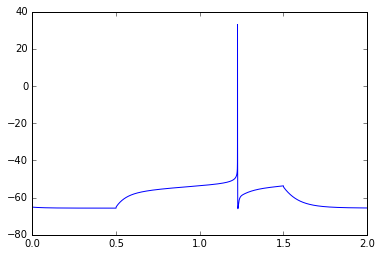

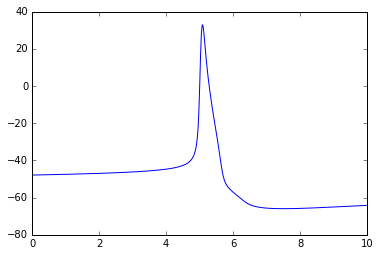

In [6]:
results = helpers.runAllTests(tests, mod1)

{'Davison2003': {'Injected current AP amplitude test': array(68.1004423040704) * mV,
                 'Injected current AP threshold test': array(-35.12323859705876) * mV,
                 'Injected current AP width test': array(0.42500000000000004) * ms,
                 'Input resistance test': array(78470665.12368964) * kg*m**2/(s**3*A**2),
                 'Resting potential test': array(-65.66587658283359) * mV,
                 'Time constant test': array(78.7822331466243) * ms}}


In [11]:
pp(results)
helpers.saveResults(results)
pp(helpers.loadResults())

{'Davison2003': {'Injected current AP amplitude test': array(68.1004423040704) * mV,
                 'Injected current AP threshold test': array(-35.12323859705876) * mV,
                 'Injected current AP width test': array(0.42500000000000004) * ms,
                 'Input resistance test': array(78470665.12368964) * kg*m**2/(s**3*A**2),
                 'Resting potential test': array(-65.66587658283359) * mV,
                 'Time constant test': array(78.7822331466243) * ms}}
{'Davison2003': {'Injected current AP amplitude test': array(68.1004423040704) * mV,
                 'Injected current AP threshold test': array(-35.12323859705876) * mV,
                 'Injected current AP width test': array(0.42500000000000004) * ms,
                 'Input resistance test': array(78470665.12368964) * kg*m**2/(s**3*A**2),
                 'Resting potential test': array(-65.66587658283359) * mV,
                 'Time constant test': array(78.7822331466243) * ms}}


In [ ]:
mod1.h.quit()